# Fake News Detection Using Machine Learning
**Focused on developing a system that leverages machine learning techniques to identify and filter out misinformation and deceptive content from various sources, such as news articles and social media. The project aims to enhance information accuracy and credibility, contributing to more reliable and trustworthy information dissemination.**

In [102]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import re, string, unicodedata
from string import punctuation
from termcolor import colored
from collections import Counter
from datetime import datetime


from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from keras.callbacks import ReduceLROnPlateau
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet

import keras
import tensorflow as tf
from keras.preprocessing import text, sequence
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.text import Tokenizer

import nltk
from nltk.corpus import stopwords
from textblob import Word
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import pos_tag
from nltk.corpus import wordnet
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional

from warnings import filterwarnings
filterwarnings('ignore')

from sklearn import set_config
set_config(print_changed_only = False)

print(colored("\nLIBRARIES WERE SUCCESFULLY IMPORTED...", "red"))


LIBRARIES WERE SUCCESFULLY IMPORTED...


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gsaig\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gsaig\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\gsaig\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### Importing the data

In [16]:
import pandas as pd

# Read the "True.csv" file into a DataFrame
true_df = pd.read_csv("True.csv")

# Read the "Fake.csv" file into a DataFrame
fake_df = pd.read_csv("Fake.csv")

# Add a 'label' column with 0 for true news and 1 for fake news
true_df['label'] = 0
fake_df['label'] = 1

In [5]:
true_df

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0
...,...,...,...,...,...
995,House panels seek documents on Puerto Rico uti...,WASHINGTON (Reuters) - A U.S. congressional co...,politicsNews,"October 26, 2017",0
996,"Trump releases some JFK files, blocks others u...",WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"October 26, 2017",0
997,Tillerson tells Myanmar army chief U.S. concer...,WASHINGTON (Reuters) - U.S. Secretary of State...,politicsNews,"October 27, 2017",0
998,"Exclusive: While advising Trump in 2016, ex-CI...",WASHINGTON (Reuters) - Former CIA director Jam...,politicsNews,"October 26, 2017",0


In [6]:
fake_df

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1
...,...,...,...,...,...
995,GOP Rep. Wants A $30k A Year Housing Allowanc...,"Not long ago, Rep. Jason Chaffetz (R-Utah), sa...",News,"June 28, 2017",1
996,Brace Yourself For 74 Percent Higher Health C...,"According to a new report, health insurance pr...",News,"June 27, 2017",1
997,Grandma Will Have To Pay More Than $20k A Yea...,The Congressional Budget Office released their...,News,"June 27, 2017",1
998,The Absolutely Cringeworthy Moment Trump Trie...,Donald Trump was in a room full of Irish repor...,News,"June 27, 2017",1


### Combining the both Sets

In [7]:
combined_df = pd.concat([true_df, fake_df], ignore_index=True)

In [27]:
combined_df

,title,text,subject,date,label,text_length
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0,749
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0,624
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0,457
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0,376
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0,852
...,...,...,...,...,...,...
1995,GOP Rep. Wants A $30k A Year Housing Allowanc...,"Not long ago, Rep. Jason Chaffetz (R-Utah), sa...",News,"June 28, 2017",1,460
1996,Brace Yourself For 74 Percent Higher Health C...,"According to a new report, health insurance pr...",News,"June 27, 2017",1,311
1997,Grandma Will Have To Pay More Than $20k A Yea...,The Congressional Budget Office released their...,News,"June 27, 2017",1,372
1998,The Absolutely Cringeworthy Moment Trump Trie...,Donald Trump was in a room full of Irish repor...,News,"June 27, 2017",1,333


### Mean, Median, Mode

In [18]:
label_mean = combined_df['label'].mean()
label_median = combined_df['label'].median()
label_mode_result = stats.mode(combined_df['label'])
label_mode = label_mode_result.mode[0]
label_mode_count = label_mode_result.count[0]

print(f"Mean: {label_mean}")
print(f"Median: {label_median}")
print(f"Mode: {label_mode} (occurs {label_mode_count} times)")

Mean: 0.5
Median: 0.5
Mode: 0 (occurs 1000 times)


### F-TEST (ANOVA ANALYSIS)

In [19]:
# Perform ANOVA F-test
f_statistic, p_value = stats.f_oneway(combined_df[combined_df['label'] == 0]['label'],
                                      combined_df[combined_df['label'] == 1]['label'])

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

F-statistic: inf
P-value: 0.0


### T-TEST

In [23]:
# Create a new column 'text_length' with the length of the 'text' column
combined_df['text_length'] = combined_df['text'].apply(lambda x: len(x.split()))

# Separate text lengths for the two groups
true_text_length = combined_df[combined_df['label'] == 0]['text_length']
fake_text_length = combined_df[combined_df['label'] == 1]['text_length']

# Perform an independent t-test
t_statistic, p_value = stats.ttest_ind(true_text_length, fake_text_length)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-statistic: -2.5639058981394967
P-value: 0.010422714146793759


In [103]:
combined_df.columns

Index(['title', 'text', 'subject', 'date', 'label', 'text_length'], dtype='object')

### Chi- Squared Test

In [30]:
from scipy.stats import chi2_contingency
# Replace "Your_Categorical_Variable" with the actual categorical variable name
categorical_variable ='label'

# Create a contingency table to assess the association between 'label' and the categorical variable
contingency_table = pd.crosstab(combined_df['label'], combined_df[categorical_variable])

# Perform a chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")

Chi-squared statistic: 1996.002
P-value: 0.0


### Linear Regression

In [104]:
import statsmodels.api as sm
# Specify the independent variable (label) and dependent variable (word count)
X = combined_df[['label']]  # Independent variable
y = combined_df['text_length']  # Dependent variable

# Add a constant term to the independent variable (intercept)
X = sm.add_constant(X)

# Fit a linear regression model
model = sm.OLS(y, X).fit()

# Get the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            text_length   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     6.574
Date:                Mon, 06 Nov 2023   Prob (F-statistic):             0.0104
Time:                        21:17:04   Log-Likelihood:                -13564.
No. Observations:                2000   AIC:                         2.713e+04
Df Residuals:                    1998   BIC:                         2.714e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        393.4860      6.751     58.282      0.0

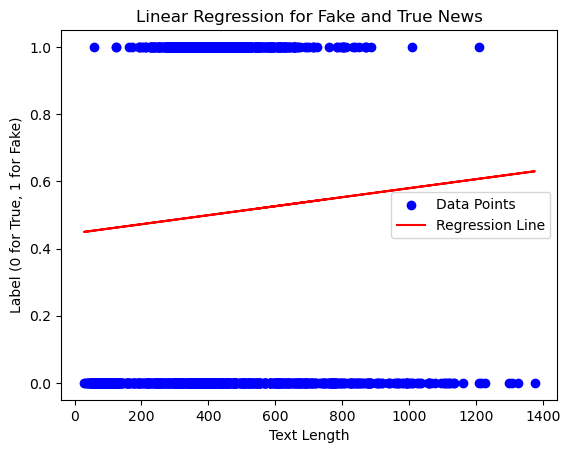

In [105]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# Sample feature and target for linear regression (e.g., text length as the feature)
feature = combined_df['text'].apply(lambda x: len(x.split()))
target = combined_df['label']

# Create and fit a linear regression model
model = LinearRegression()
model.fit(np.array(feature).reshape(-1, 1), target)

# Predict values using the linear regression model
predicted_values = model.predict(np.array(feature).reshape(-1, 1))

# Plot the data points and the regression line
plt.scatter(feature, target, label='Data Points', color='blue')
plt.plot(feature, predicted_values, label='Regression Line', color='red')
plt.xlabel('Text Length')
plt.ylabel('Label (0 for True, 1 for Fake)')
plt.legend()
plt.title('Linear Regression for Fake and True News')
plt.show()

### Logistic Regression

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Specify the independent variables (features) and the target variable (label)
X = combined_df[['text_length']]  # Replace with your feature columns
y = combined_df['label']  # Target variable

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the logistic regression model
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = logistic_regression.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.52
Confusion Matrix:
[[125  74]
 [118  83]]
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.63      0.57       199
           1       0.53      0.41      0.46       201

    accuracy                           0.52       400
   macro avg       0.52      0.52      0.51       400
weighted avg       0.52      0.52      0.51       400



Accuracy: 0.52
Confusion Matrix:
[[125  74]
 [118  83]]


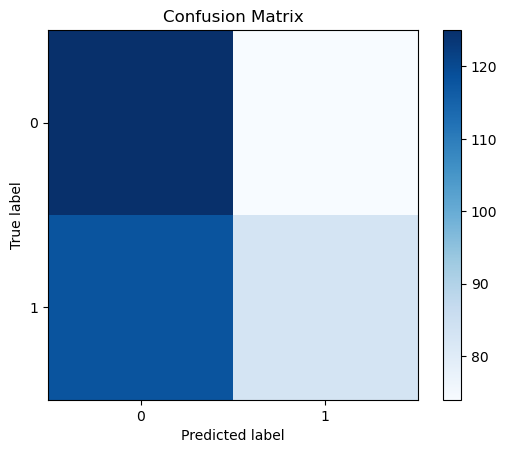

In [107]:
# Create and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xticks([0, 1], [0, 1])
plt.yticks([0, 1], [0, 1])
plt.show()

### Decision Tree

In [108]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Initialize and fit the decision tree classifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = decision_tree.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.6825
Confusion Matrix:
[[132  67]
 [ 60 141]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.66      0.68       199
           1       0.68      0.70      0.69       201

    accuracy                           0.68       400
   macro avg       0.68      0.68      0.68       400
weighted avg       0.68      0.68      0.68       400



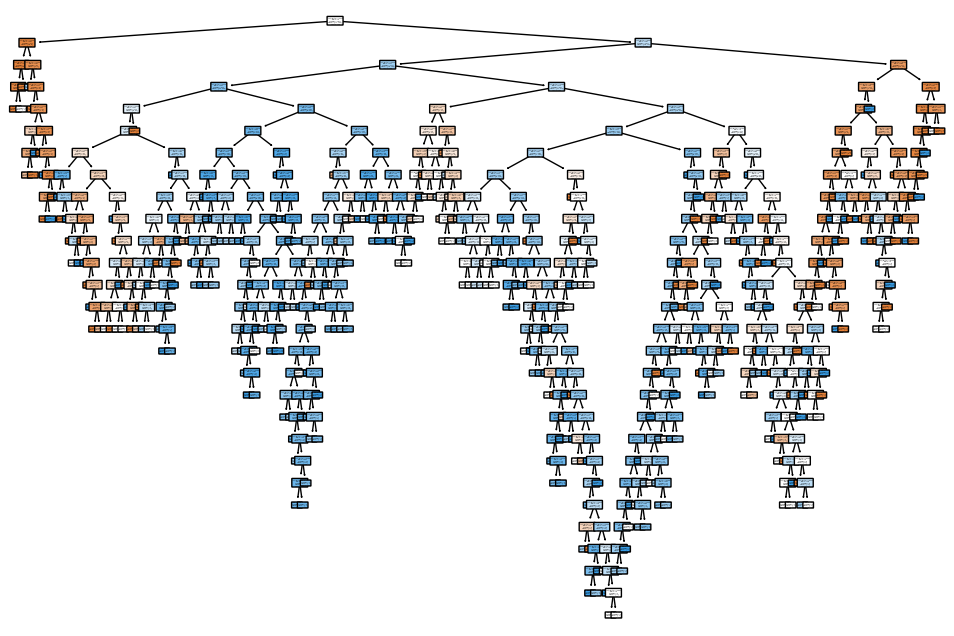

In [66]:
# Initialize and fit the Decision Tree classifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(decision_tree, filled=True, feature_names=X.columns.tolist(), class_names=['True', 'Fake'], rounded=True)
plt.show()

### Random Forest

In [109]:
from sklearn.ensemble import RandomForestClassifier
# Initialize and fit the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = random_forest.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.7025
Confusion Matrix:
[[128  71]
 [ 48 153]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.64      0.68       199
           1       0.68      0.76      0.72       201

    accuracy                           0.70       400
   macro avg       0.71      0.70      0.70       400
weighted avg       0.71      0.70      0.70       400



### K-Nearest Neighbour

In [68]:
from sklearn.neighbors import KNeighborsClassifier
# Initialize and fit the K-NN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed
knn.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.6975
Confusion Matrix:
[[123  76]
 [ 45 156]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.62      0.67       199
           1       0.67      0.78      0.72       201

    accuracy                           0.70       400
   macro avg       0.70      0.70      0.70       400
weighted avg       0.70      0.70      0.70       400



### Support Vector Machine

In [69]:
from sklearn.svm import SVC
# Initialize and fit the SVM classifier
svm_classifier = SVC(kernel='linear')  # You can choose different kernels such as 'linear', 'rbf', or 'poly'
svm_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.555
Confusion Matrix:
[[100  99]
 [ 79 122]]
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.50      0.53       199
           1       0.55      0.61      0.58       201

    accuracy                           0.56       400
   macro avg       0.56      0.55      0.55       400
weighted avg       0.56      0.56      0.55       400



In [75]:
print("X_train_padded shape:", X_train_padded.shape)
print("y_train shape:", y_train.shape)

X_train_padded shape: (1, 500)
y_train shape: (1600,)


### Artifical Neural Network

In [111]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Build the ANN model
model = keras.Sequential([
    keras.layers.Embedding(input_dim=max_words, output_dim=16, input_length=max_sequence_length),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

Epoch 1/5


ValueError: in user code:

    File "C:\Users\gsaig\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1377, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\gsaig\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1360, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\gsaig\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1349, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\gsaig\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1126, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\gsaig\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\gsaig\anaconda3\Lib\site-packages\keras\src\engine\input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_14' (type Sequential).
    
    Input 0 of layer "dense_28" is incompatible with the layer: expected axis -1 of input shape to have value 8000, but received input with shape (None, 16)
    
    Call arguments received by layer 'sequential_14' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1), dtype=int64)
      • training=True
      • mask=None


In [112]:
combined_df

,title,text,subject,date,label,text_length
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0,749
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0,624
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0,457
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0,376
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0,852
...,...,...,...,...,...,...
1995,GOP Rep. Wants A $30k A Year Housing Allowanc...,"Not long ago, Rep. Jason Chaffetz (R-Utah), sa...",News,"June 28, 2017",1,460
1996,Brace Yourself For 74 Percent Higher Health C...,"According to a new report, health insurance pr...",News,"June 27, 2017",1,311
1997,Grandma Will Have To Pay More Than $20k A Yea...,The Congressional Budget Office released their...,News,"June 27, 2017",1,372
1998,The Absolutely Cringeworthy Moment Trump Trie...,Donald Trump was in a room full of Irish repor...,News,"June 27, 2017",1,333


### K-Mean

In [90]:
combined_text = pd.concat([true_df['text'], fake_df['text']])

# Preprocess the text data using TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust the number of features as needed
tfidf_matrix = tfidf_vectorizer.fit_transform(combined_text)

# Perform K-Means clustering
num_clusters = 2  # Assuming you want to separate true news and fake news
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(tfidf_matrix)

# Add cluster labels to your DataFrames
true_df['cluster_label'] = kmeans.labels_[:len(true_df)]
fake_df['cluster_label'] = kmeans.labels_[len(true_df):]

# Print cluster centers (optional)
print("Cluster Centers:")
print(kmeans.cluster_centers_)

Cluster Centers:
[[0.00753294 0.00609772 0.00262854 ... 0.03642042 0.00417187 0.01061408]
 [0.01872197 0.01873503 0.00575621 ... 0.00555961 0.00339069 0.00098431]]


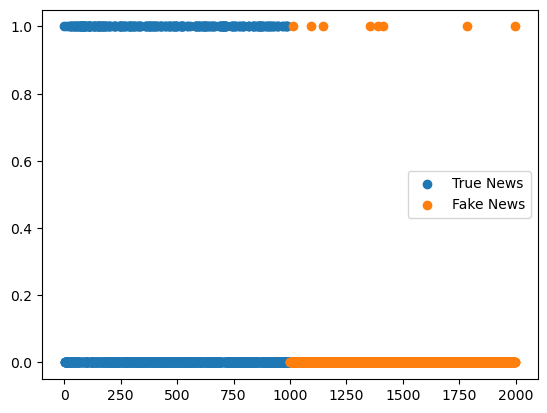

In [92]:
# Create arrays for x and y values
true_x = np.arange(len(true_df))
fake_x = np.arange(len(fake_df)) + len(true_df)

plt.scatter(true_x, true_df['cluster_label'], label="True News")
plt.scatter(fake_x, fake_df['cluster_label'], label="Fake News")
plt.legend()
plt.show()

### Principal Component Analysis

In [95]:
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
# Preprocess the text data using TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust the number of features as needed
tfidf_matrix = tfidf_vectorizer.fit_transform(combined_text)

# Perform Truncated SVD (PCA alternative) to reduce dimensionality
n_components = 50  # Number of components to retain
svd = TruncatedSVD(n_components=n_components)
tfidf_svd = svd.fit_transform(tfidf_matrix)

# Perform K-Means clustering on the SVD-transformed data
num_clusters = 2  # Assuming you want to separate true news and fake news
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(tfidf_svd)

# Add cluster labels to your DataFrames
true_df['cluster_label'] = kmeans.labels_[:len(true_df)]
fake_df['cluster_label'] = kmeans.labels_[len(true_df):]

# Print cluster centers (optional)
print("Cluster Centers:")
print(kmeans.cluster_centers_)

Cluster Centers:
[[ 5.40786658e-01 -4.66265746e-02  1.92879827e-02  5.87698799e-03
  -5.93530746e-03  4.47970078e-03 -1.70918464e-03  1.82436834e-03
   3.30984302e-03  2.89232131e-04 -3.62061651e-03  2.13015681e-03
   4.02943272e-03  1.36934493e-03 -4.42378576e-04  8.57309296e-04
   4.14555802e-04  2.12083784e-03 -3.56829793e-03  1.34906201e-04
  -9.54908093e-04  1.47833275e-03  6.63853817e-04  2.82281552e-04
   1.40832864e-03  2.18170009e-04  1.84104397e-03  7.71695653e-04
   1.31732644e-03  9.78694533e-05 -8.53973218e-04  1.36662016e-03
  -1.12928972e-03 -4.85179784e-04 -2.04835573e-04  1.01227871e-03
   6.17681430e-04  5.64527924e-04 -6.30368067e-04 -1.79354343e-04
   1.20740003e-03  6.60780715e-04 -3.34013055e-04  3.19319715e-04
   7.99725178e-04 -4.38551227e-04 -4.09223457e-04 -1.03429520e-04
   2.62693535e-04  7.88694405e-04]
 [ 4.87026122e-01  3.50231861e-01 -1.06323214e-01 -1.91419870e-02
   7.80512354e-02  1.63579301e-02  1.26623249e-03 -6.95728306e-03
   8.69698965e-03  3.265

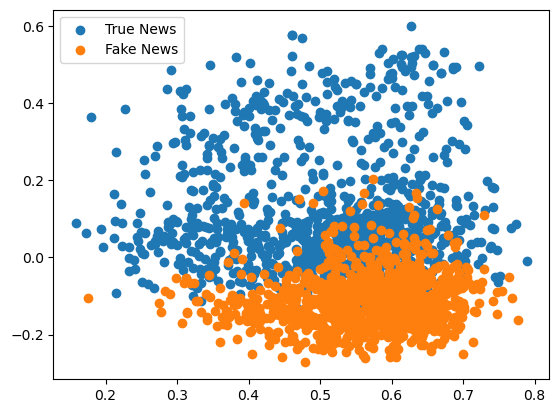

In [97]:
plt.scatter(tfidf_svd[:len(true_df), 0], tfidf_svd[:len(true_df), 1], label="True News")
plt.scatter(tfidf_svd[len(true_df):, 0], tfidf_svd[len(true_df):, 1], label="Fake News")
plt.legend()
plt.show()

### Performance Analysis

In [98]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(tfidf_svd, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.12849609788693578


In [99]:
inertia = kmeans.inertia_
print(f"Inertia: {inertia}")

Inertia: 491.3524560942913


In [101]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create true labels based on your domain knowledge
true_labels = [0] * len(true_df) + [1] * len(fake_df)

accuracy = accuracy_score(true_labels, kmeans.labels_)
confusion = confusion_matrix(true_labels, kmeans.labels_)
report = classification_report(true_labels, kmeans.labels_)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", report)


Accuracy: 0.3765
Confusion Matrix:
 [[746 254]
 [993   7]]
Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.75      0.54      1000
           1       0.03      0.01      0.01      1000

    accuracy                           0.38      2000
   macro avg       0.23      0.38      0.28      2000
weighted avg       0.23      0.38      0.28      2000

